# Project: Boston Housing Data by Sai Sudharshan Prerepa

### **Task 1: Familiarize yourself with the dataset:**

The following describes the dataset variables:
CRIM - per capita crime rate by town

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS - proportion of non-retail business acres per town.

- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- NOX - nitric oxides concentration (parts per 10 million)

- RM - average number of rooms per dwelling

- AGE - proportion of owner-occupied units built prior to 1940

- DIS - weighted distances to five Boston employment centres

- RAD - index of accessibility to radial highways

- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town

- LSTAT - % lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's


### **Task 3: Load the dataset in a Jupyter Notebook using Watson Studio.**

In [3]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### **Task 4: Generate basic statistics and visualizations for upper management.**

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:


#### **Question 1: For the "Median value of owner-occupied homes" provide a boxplot**

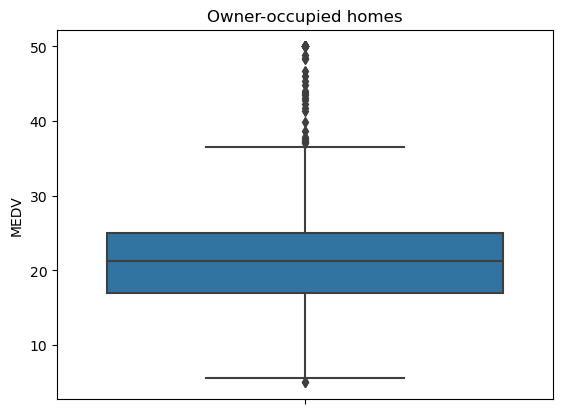

In [6]:
bp_och = sns.boxplot(y = 'MEDV', data = boston_df)
bp_och.set_title('Owner-occupied homes')
plt.show()

#### **Question 2: Provide a bar plot for the Charles river variable**

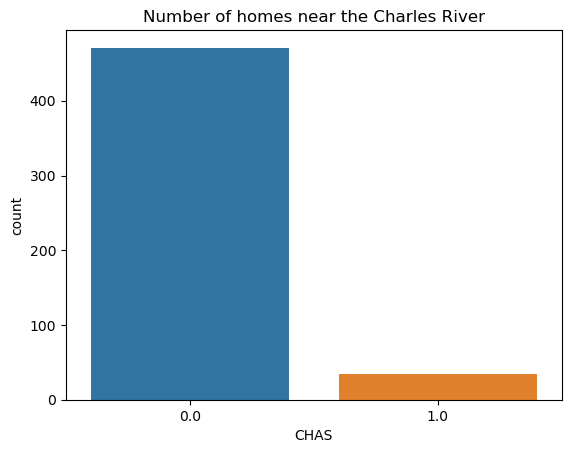

In [7]:
barp_crv = sns.countplot(x="CHAS", data=boston_df)
barp_crv.set_title('Number of homes near the Charles River')
plt.show()

#### **Question 3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and Younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and Older'

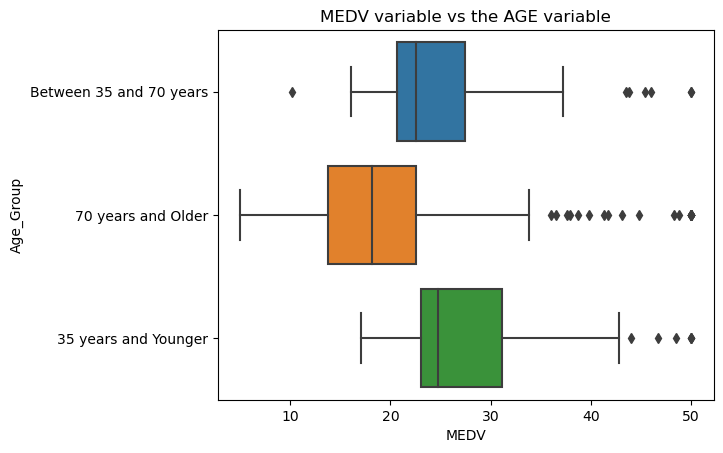

In [10]:
bp_age = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
bp_age.set_title('MEDV variable vs the AGE variable')
plt.show()

#### **Question 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

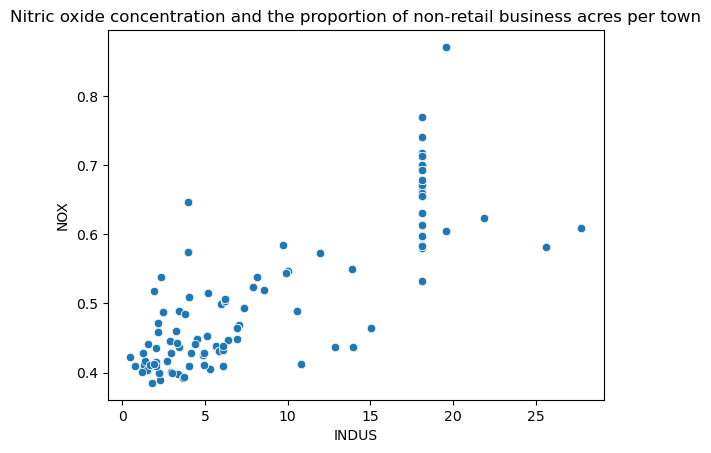

In [11]:
sp_relation = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
sp_relation.set_title('Nitric oxide concentration and the proportion of non-retail business acres per town')
plt.show()

From the above scatter plot, we can observe that low concentrations of nitric oxide are present in low proportion of non-retail business acres per town

#### **Question 5: Create a histogram for the pupil to teacher ratio variable**

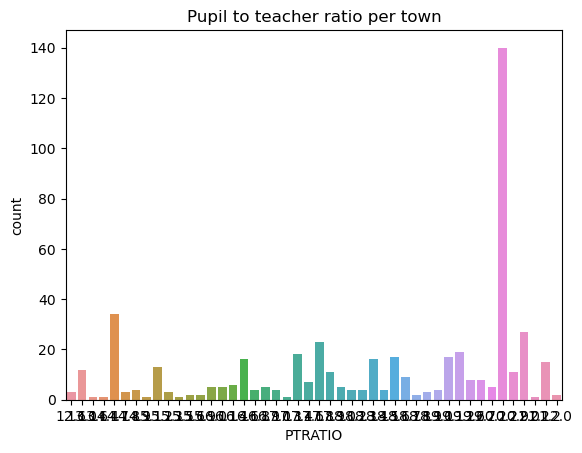

In [12]:
ht_ratio = sns.countplot(x = 'PTRATIO', data = boston_df)
ht_ratio.set_title('Pupil to teacher ratio per town')
plt.show()

### **Task 5: Use the appropriate tests to answer the questions provided.**

#### **Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

Null Hypothesis: There is no significant difference in median value between houses bounded and not bounded by the Charles River

Alternative Hypothesis: There is a significant difference in median value between houses bounded and not bounded by the Charles River

In [13]:
boston_df.loc[(boston_df['CHAS'] == 0), 'TRACT_BOUNDS'] = 'AWAY FROM RIVER'
boston_df.loc[(boston_df['CHAS'] == 1), 'TRACT_BOUNDS'] = 'NEAR RIVER'
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group,TRACT_BOUNDS
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years,AWAY FROM RIVER
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and Older,AWAY FROM RIVER
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years,AWAY FROM RIVER
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years,AWAY FROM RIVER
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years,AWAY FROM RIVER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,Between 35 and 70 years,AWAY FROM RIVER
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and Older,AWAY FROM RIVER
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and Older,AWAY FROM RIVER
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and Older,AWAY FROM RIVER


In [15]:
import scipy.stats

scipy.stats.ttest_ind(boston_df[boston_df['TRACT_BOUNDS'] == 'AWAY FROM RIVER']['MEDV'], boston_df[boston_df['TRACT_BOUNDS'] == 'NEAR RIVER']['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Since p-value < 0.05, we reject the Null Hypothesis. Therefore, there is a significant difference in median value between houses near the Charles River and houses away from river

#### **Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

Null Hypotesis: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

Alternative Hypothesis: There is difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

In [16]:
from statsmodels.formula.api import ols

ols_obj = ols('MEDV ~ AGE', data = boston_df).fit()
anova_results = sm.stats.anova_lm(ols_obj)
print(anova_results)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Since p value < 0.05, we reject the Null Hypothesis. Therefore, there is difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

#### **Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

Null Hypothesis: There is no relatiopnship between Nitric Oxide concentration and the proportion of non-retail business acres per town

Alternative Hypothesis: There is a relatiopnship between Nitric Oxide concentration and the proportion of non-retail business acres per town

In [17]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

Since the p value < 0.05, we reject the Null Hypothesis and conclude that there is a strong relationship between Nitric Oxide concentration and the proportion of non-retail business acres per town

#### **Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [18]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
prediction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        13:56:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From above results, the coef value of DIS (1.0916) shows that an additional weighted distance to the five Boston employment centres increases the median values of owner occupied homes by 1.0916